20
[[ 0  5  1]
 [ 0  3  5]
 [ 0  2  3]
 [ 0  4  2]
 [ 0  1  4]
 [ 1  5  8]
 [ 5  3 10]
 [ 3  2  7]
 [ 2  4 11]
 [ 4  1  9]
 [ 7 11  6]
 [11  9  6]
 [ 9  8  6]
 [ 8 10  6]
 [10  7  6]
 [ 2 11  7]
 [ 4  9 11]
 [ 1  8  9]
 [ 5 10  8]
 [ 3  7 10]]
[[ 0.          0.52573111  0.85065081]
 [ 0.         -0.52573111  0.85065081]
 [ 0.52573111  0.85065081  0.        ]
 [-0.52573111  0.85065081  0.        ]
 [ 0.85065081  0.          0.52573111]
 [-0.85065081  0.          0.52573111]
 [-0.         -0.52573111 -0.85065081]
 [-0.          0.52573111 -0.85065081]
 [-0.52573111 -0.85065081 -0.        ]
 [ 0.52573111 -0.85065081 -0.        ]
 [-0.85065081 -0.         -0.52573111]
 [ 0.85065081 -0.         -0.52573111]]


Text(0.5, 0.98, 'Icospheres with different subdivision frequency')

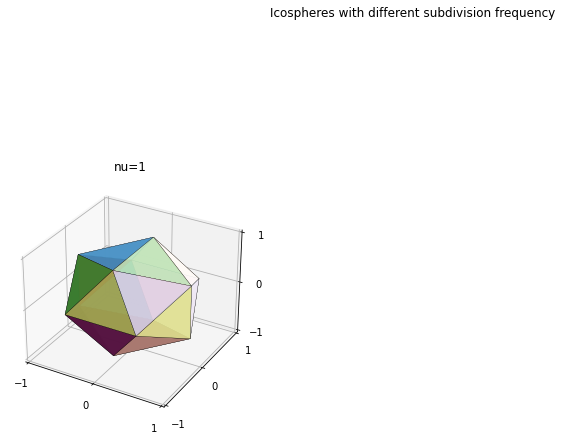

In [11]:
''' 
An example of using icosphere module. Plots the icosphere in matplotlib, 
as good as matplotlib can -- very slowly and not so very nice.

'''
from icosphere import icosphere
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import mpl_toolkits.mplot3d 

fig = plt.figure(figsize=[15,15])
for nu in range(1,2):
#for nu in range(1,7):

    vertices, faces = icosphere(nu=nu)
    print(len(faces))
    print(faces)
    print(vertices)
    
    # basic mesh color, divided in 20 groups (one for each original face)
    jet = matplotlib.cm.tab20(np.linspace(0,1,20))
    jet = np.tile(jet[:,:3], (1, faces.shape[0]//20))
    jet = jet.reshape(faces.shape[0], 1, 3)

    # computing face shading intensity based on face normals  
    face_normals = np.cross(vertices[faces[:,1]]-vertices[faces[:,0]], 
                            vertices[faces[:,2]]-vertices[faces[:,0]])
    face_normals /= np.sqrt(np.sum(face_normals**2, axis=1, keepdims=True))               
    light_source = matplotlib.colors.LightSource(azdeg=60, altdeg=30)
    intensity = light_source.shade_normals(face_normals)

    # blending face colors and face shading intensity
    rgb = light_source.blend_hsv(rgb=jet, intensity=intensity.reshape(-1,1,1))   

    # adding alpha value, may be left out
    rgba = np.concatenate((rgb, 0.9*np.ones(shape=(rgb.shape[0],1,1))), axis=2) 

    # creating mesh with given face colors
    poly = mpl_toolkits.mplot3d.art3d.Poly3DCollection(vertices[faces])
    poly.set_facecolor(rgba.reshape(-1,4)) 
    poly.set_edgecolor('black')
    poly.set_linewidth(0.25)

    # and now -- visualization! 
    ax = fig.add_subplot(2,3,nu, projection='3d')                  

    ax.add_collection3d(poly) 
        
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    ax.set_title(f'nu={nu}')
fig.suptitle('Icospheres with different subdivision frequency')
   

